<a href="https://colab.research.google.com/github/kimdesok/FinanceDataReader/blob/master/MultipleMarketIndexes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U finance-dataReader
import FinanceDataReader as fdr
import matplotlib.pyplot as plt


     |████████████████████████████████| 48 kB 4.0 MB/s 


In [19]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
   
def market_index_graphs(start_date, disp_days, entity):

  if (entity == 'Market'):
      label = {'US500':'S&P500', 'SSEC':'Chinese Market', 'KS11':'KOSPI', 'JP225':'Japanese Market', 'UK100':'UK Market', 'DE30':'Germany Market', 'FCHI':'France Market', 'HNX30':'Hong Kong Hang Seng'}
  elif (entity == 'Currency Exchange'):
      label = {'USD/KRW':'Dollar to Won', 'CNY/KRW':'Yuen to Won', 'JPY/KRW':'Yen to Won', 'USD/JPY':'Dollar to Yen'}
  elif (entity == 's. Korea Market'):
      label = {'KS11':'KOSPI','KQ11':'KOSDAQ'}
  elif (entity == 'Currency Exchange'):
      label = {'USD/KRW':'Dollar to Won', 'CNY/KRW':'Yuen to Won', 'JPY/KRW':'Yen to Won', 'USD/JPY':'Dollar to Yen'}
  elif (entity == 'Commodity'):
      label = {'NG':'Natural Gas','ZG':'Gold','Zi':'Silver','Hi':'Copper', 'CL':'WTi Oil'}
  else:
      print("Input the entity label, either 'Market' or  'Currency Exchange' or 'Commodity")
      return
  
  #Retrieve the data
  df_list = {}
  for idx, code in label.items():
    print(idx)
    df_list[idx] = fdr.DataReader(idx, start_date)

    if(disp_days > len(df_list[idx])) :
      disp_days = len(df_list[idx])
      print( code + ': Display date is reset to the number of days from the start date to today.')

  #Plot
  for idx, code in  label.items():

    start_date = df_list[idx].index[0]
    disp_date = df_list[idx].index[-1*disp_days]
    end_date = df_list[idx].index[-1]

    print('\n')
    print(color.BOLD + color.RED + code + color.END, ': Displaying from ', start_date, 'to ', end_date, '\n')
    
    fig, ax1 = plt.subplots(figsize=(20, 10))

    h1 = df_list[idx]['Close'][disp_date:]
    h2 = df_list[idx]['Close'][start_date:].rolling(200).mean()
    h3 = df_list[idx]['Close'][start_date:].rolling(50).mean()
    h4 = df_list[idx]['Close'][start_date:].rolling(20).mean()
    h5 = df_list[idx]['Close'][start_date:].rolling(5).mean()
    h1.plot(linewidth=4,color='darkgray', label=idx, marker='o')
    h2[disp_date:].plot(color='orange', linewidth=2, label='200 days ave.')
    h3[disp_date:].plot(color='darkred', linewidth=2, label='50 days ave.')
    h4[disp_date:].plot(color='green', linewidth=2, label='20 days ave.')
    h5[disp_date:].plot(color='blue', linewidth=2, label='5 days ave.')

    plt.title(code + ': ' + entity + ' Index')
    plt.ylabel('Index')
    plt.legend(loc='lower left')
    plt.grid(True)
    plt.show()
    plt.close()

KS11
KQ11


KOSPI : Displaying from  2020-01-02 00:00:00 to  2022-04-04 00:00:00 



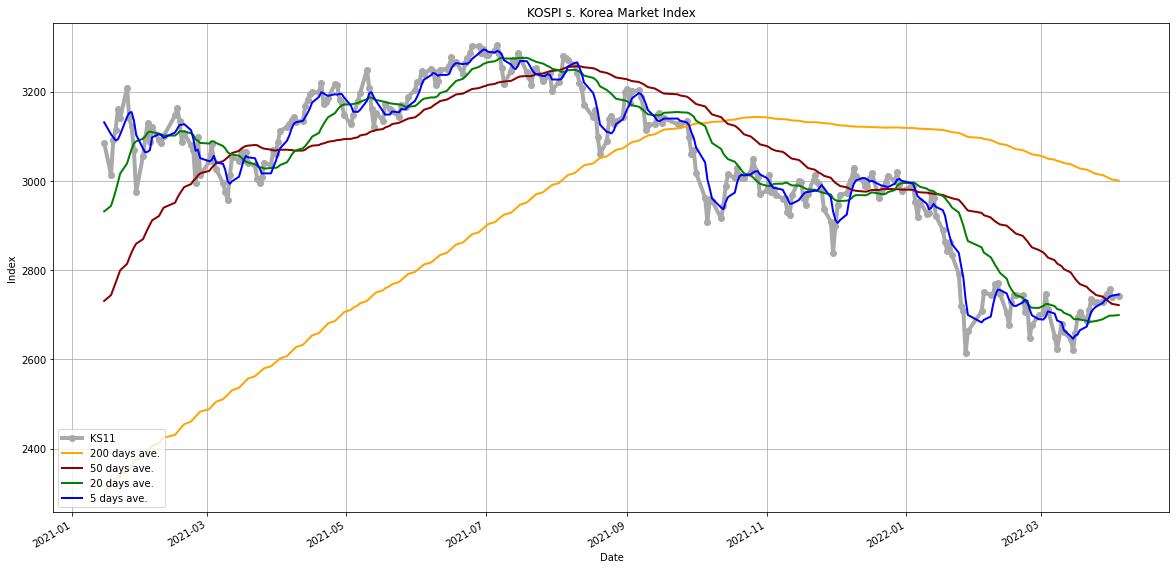



KOSDAQ : Displaying from  2020-01-02 00:00:00 to  2022-04-04 00:00:00 



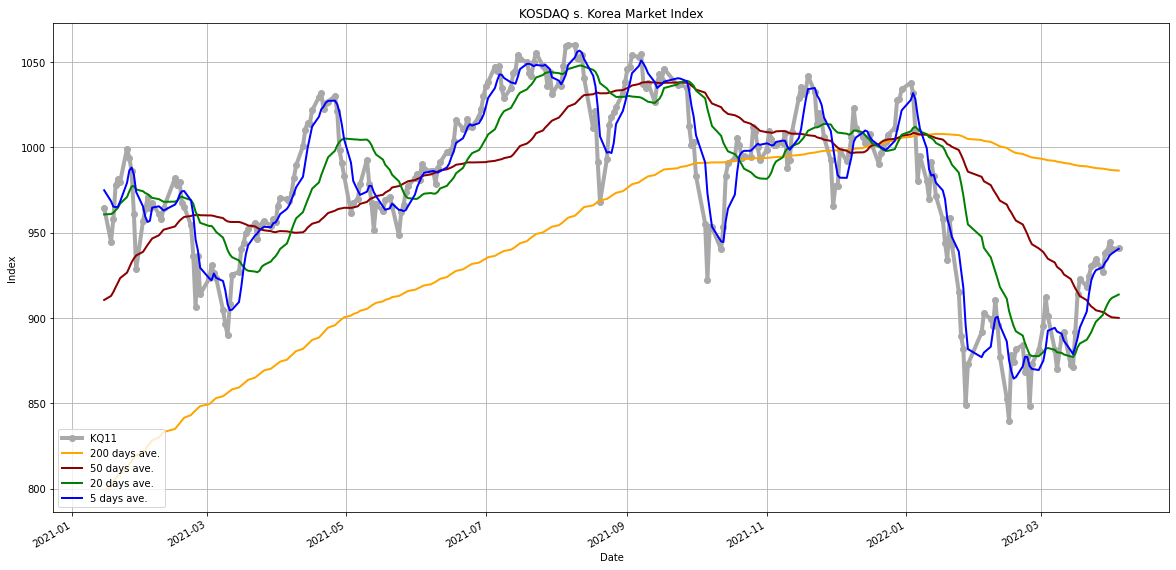

In [18]:
market_index_graphs('2020', 300, 's. Korea Market')

US500
SSEC
KS11
JP225
UK100
DE30
FCHI
HNX30


S&P500 : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



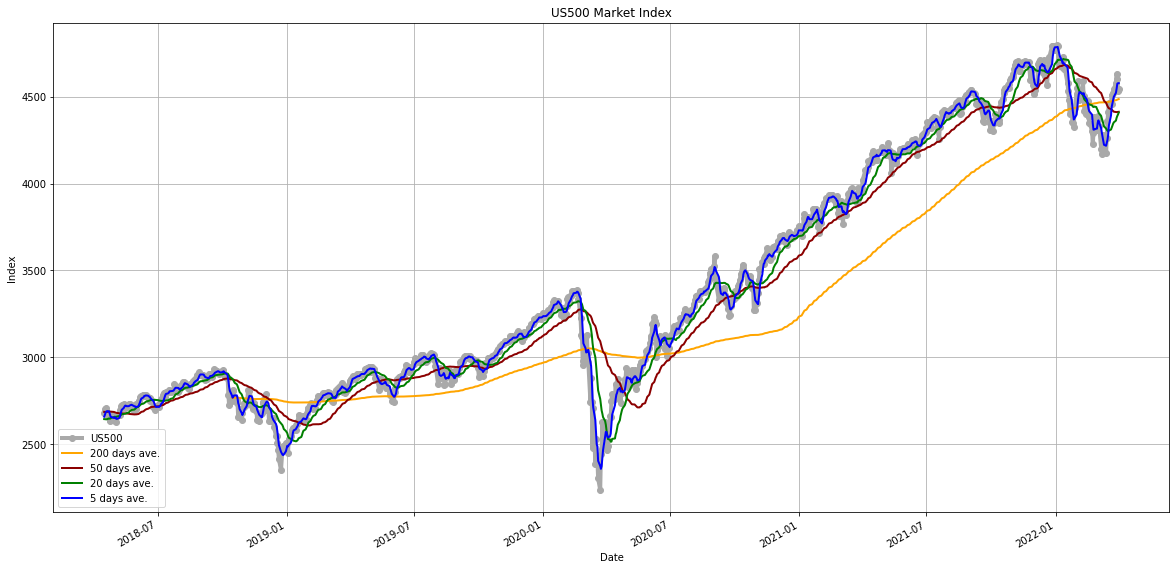



Chinese Market : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



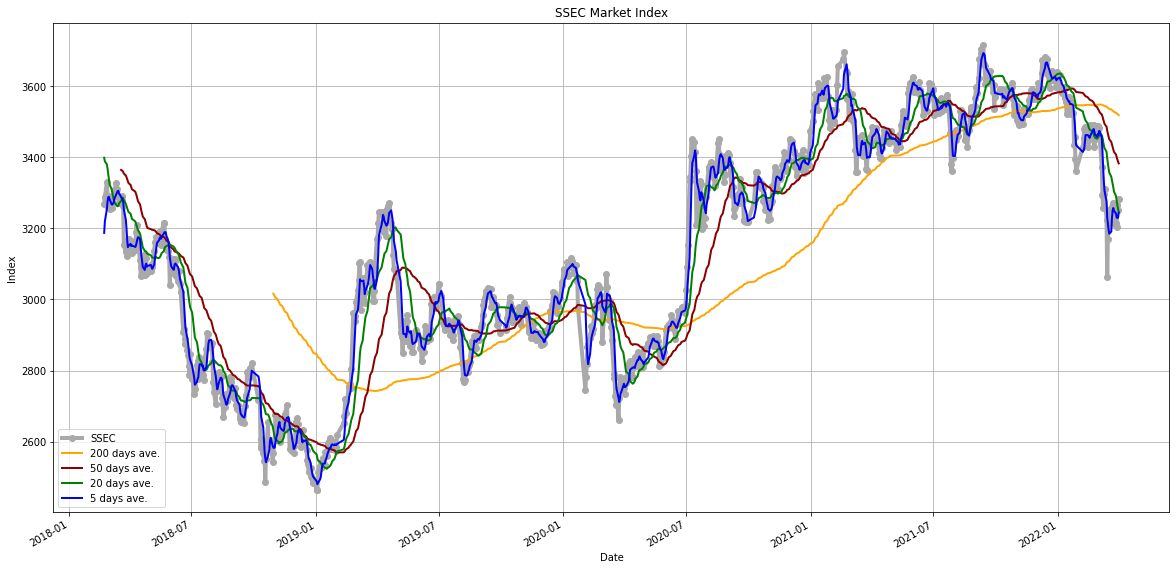



KOSPI : Displaying from  2018-01-02 00:00:00 to  2022-04-04 00:00:00 



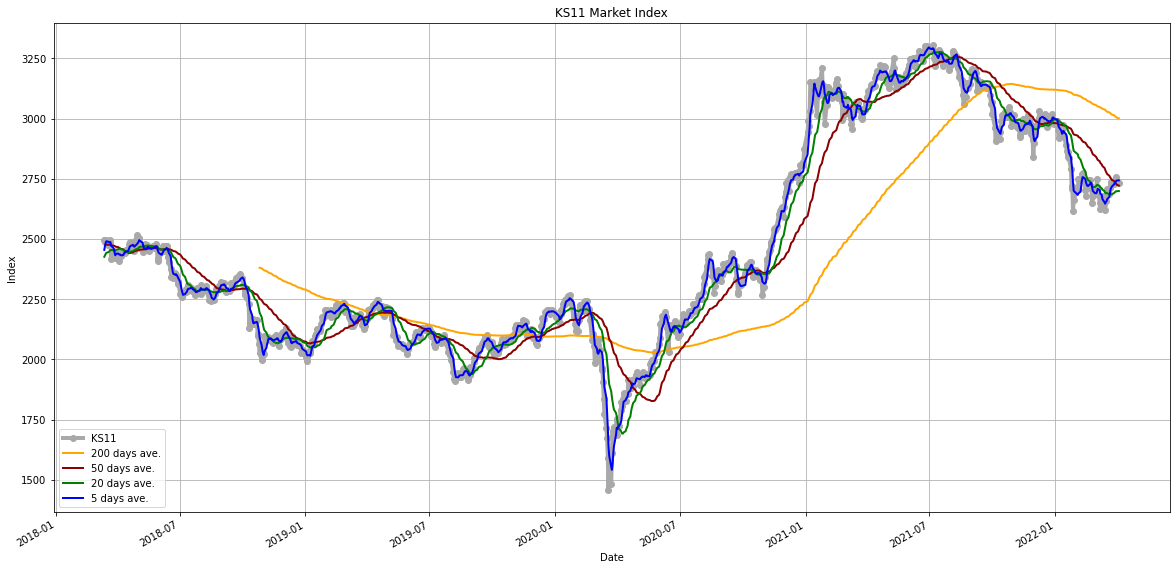



Japanese Market : Displaying from  2018-01-04 00:00:00 to  2022-04-01 00:00:00 



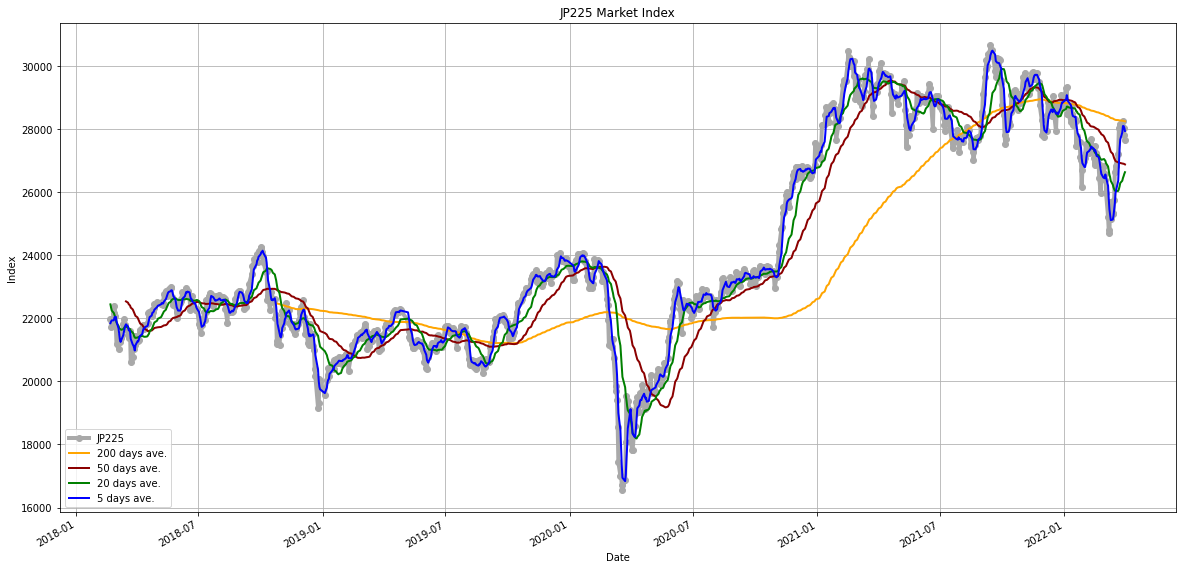



UK Market : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



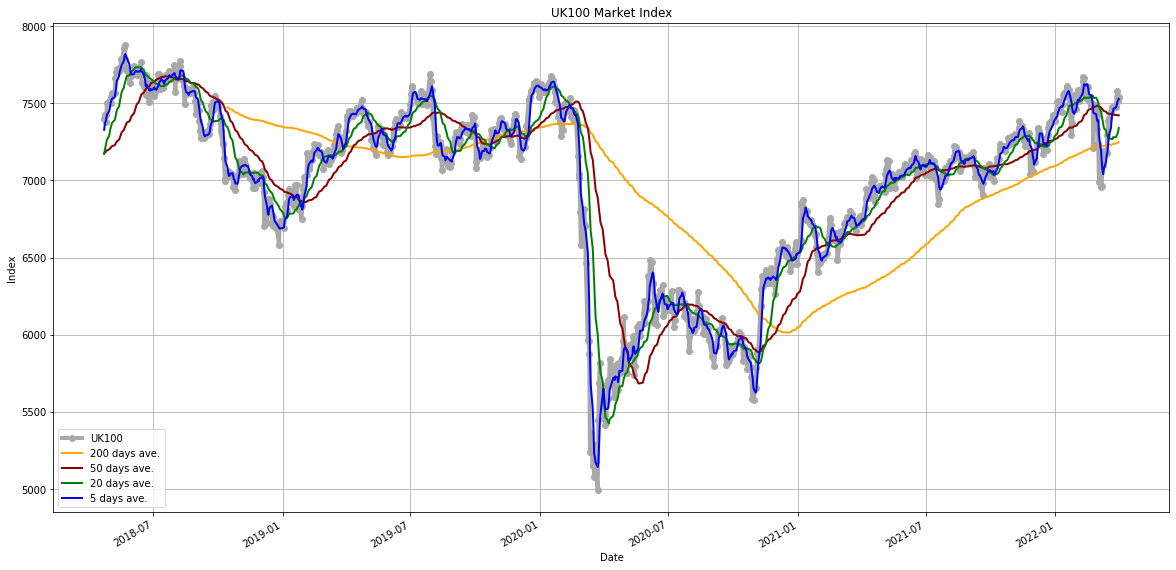



Germany Market : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



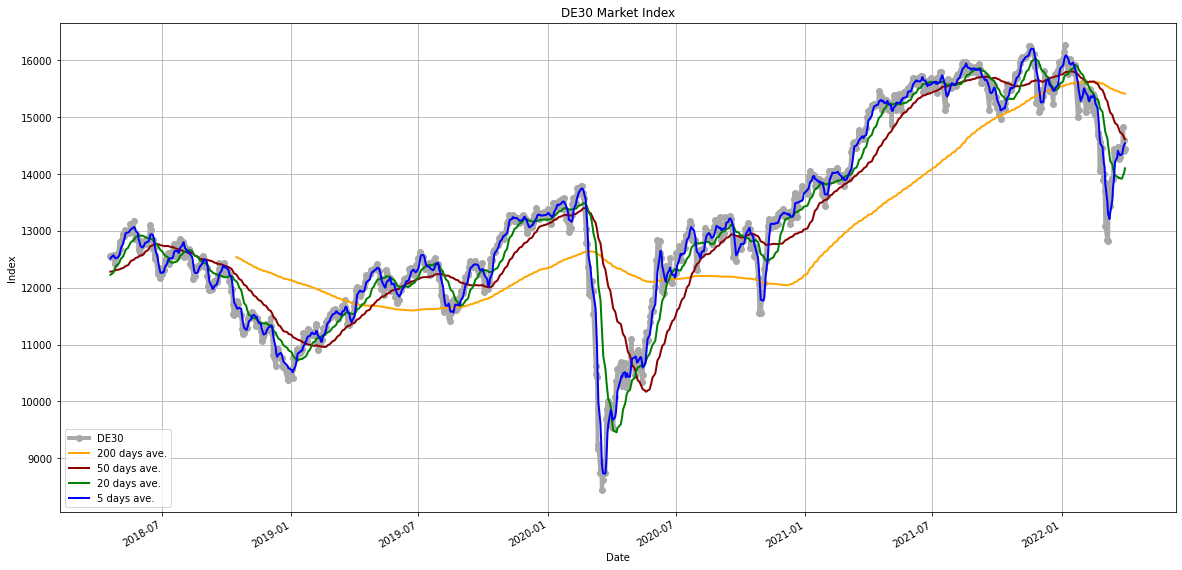



France Market : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



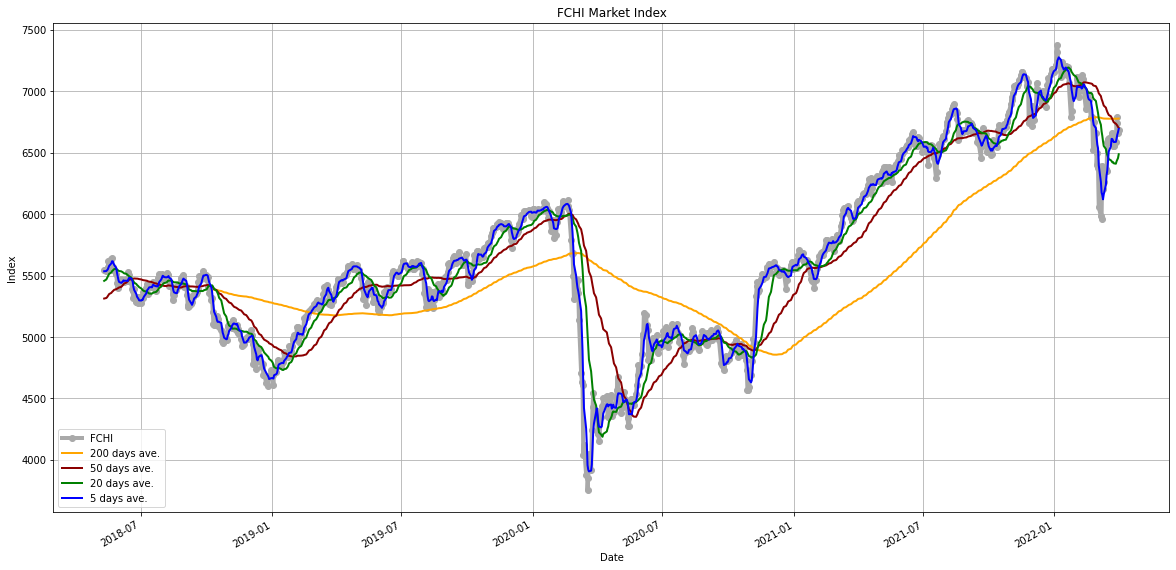



Hong Kong Hang Seng : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



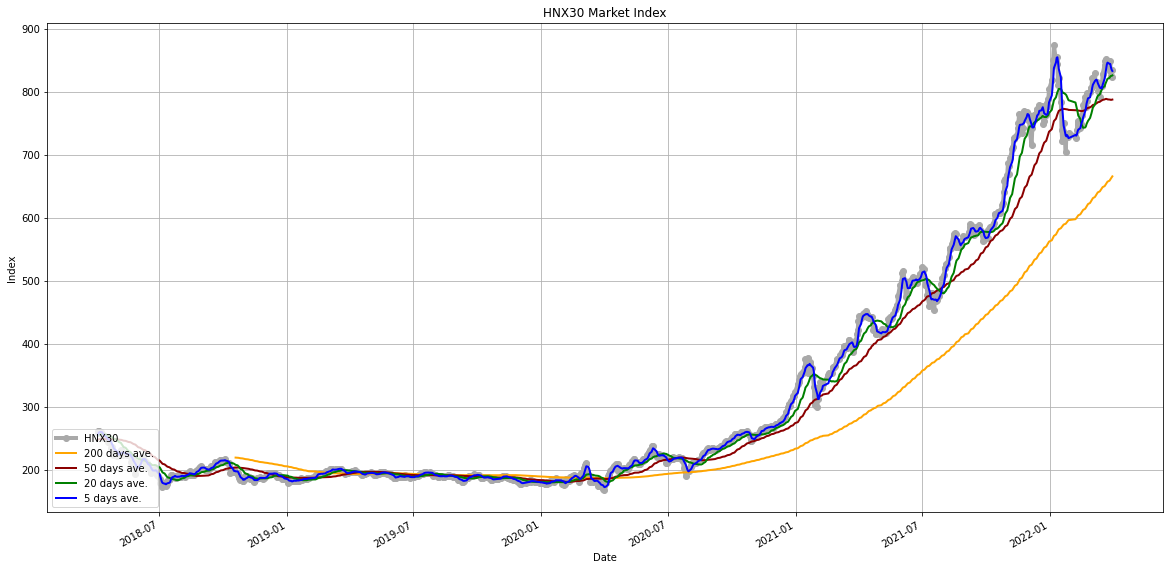

In [6]:
market_index_graphs('2018', 1000, 'Market')

USD/KRW
CNY/KRW
JPY/KRW
USD/JPY


Dollar to Won : Displaying from  2020-01-01 00:00:00 to  2022-04-04 00:00:00 



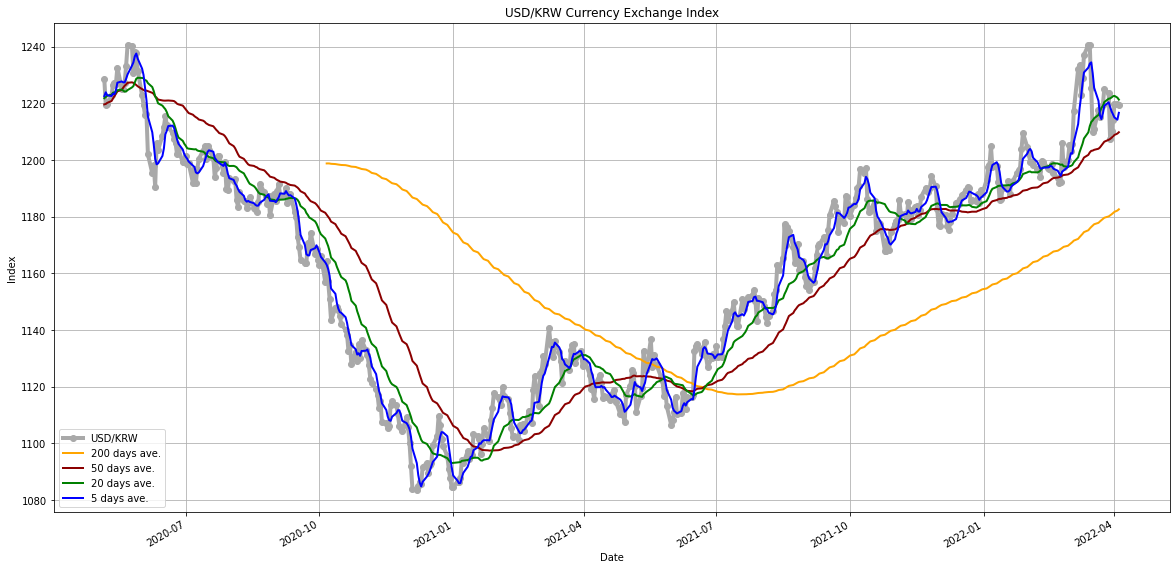



Yuen to Won : Displaying from  2020-01-01 00:00:00 to  2022-04-04 00:00:00 



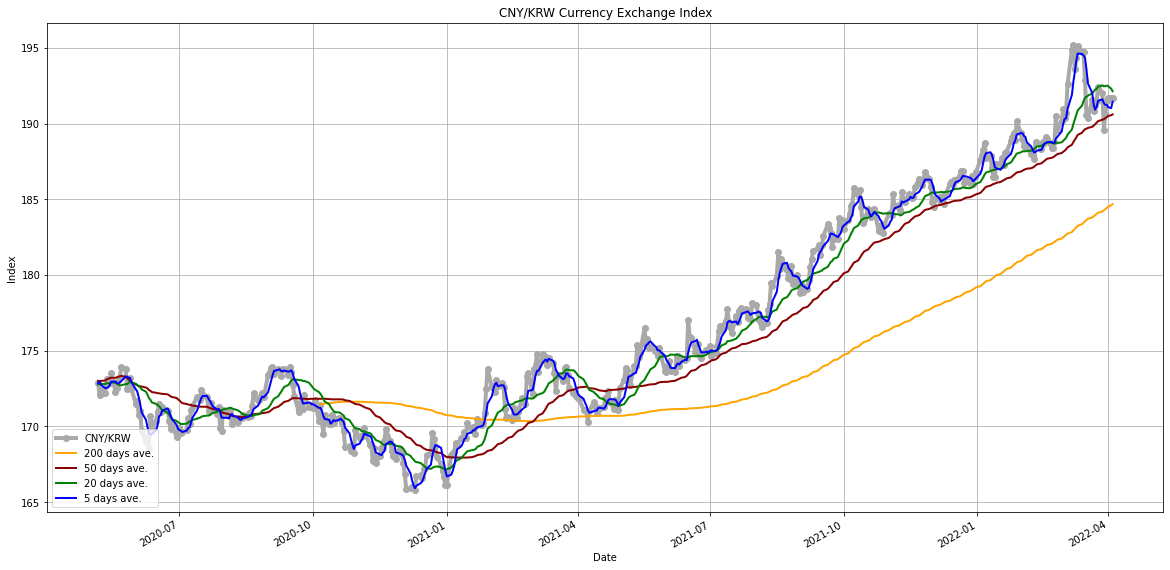



Yen to Won : Displaying from  2020-01-01 00:00:00 to  2022-04-04 00:00:00 



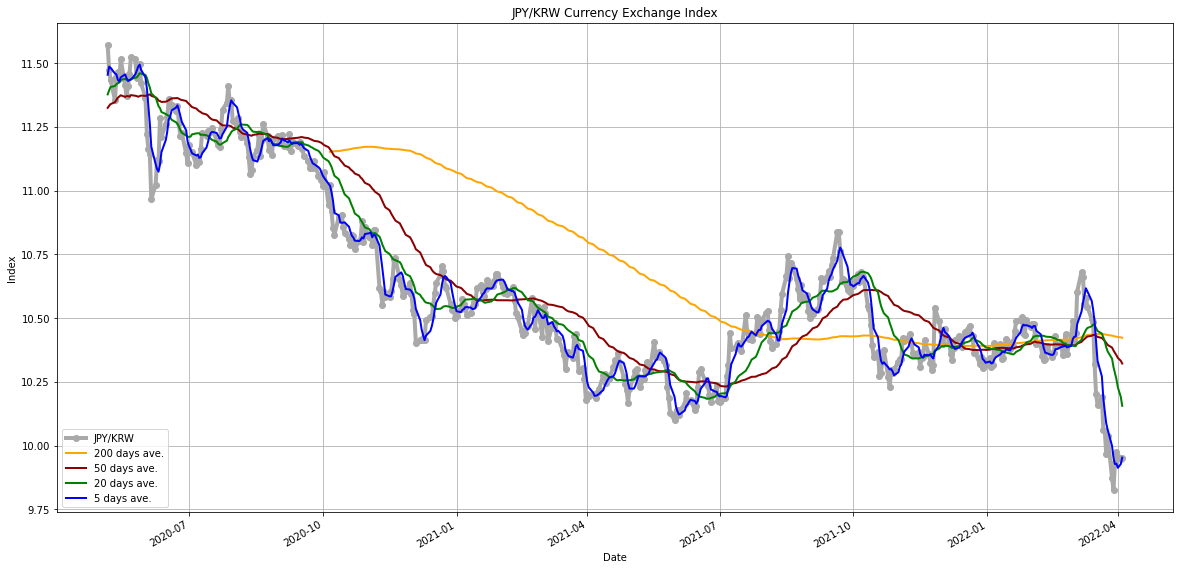



Dollar to Yen : Displaying from  2020-01-01 00:00:00 to  2022-04-04 00:00:00 



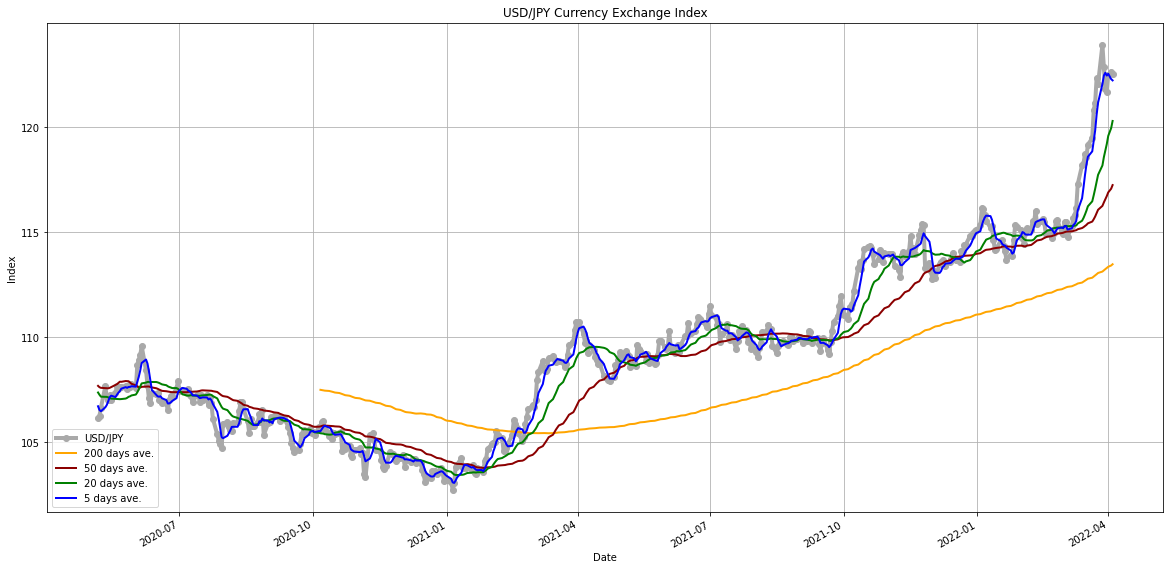

In [4]:
market_index_graphs('2020', 500, 'Currency Exchange')

NG
ZG
Zi
Hi
CL


Natural Gas : Displaying from  2018-01-02 00:00:00 to  2022-03-31 00:00:00 



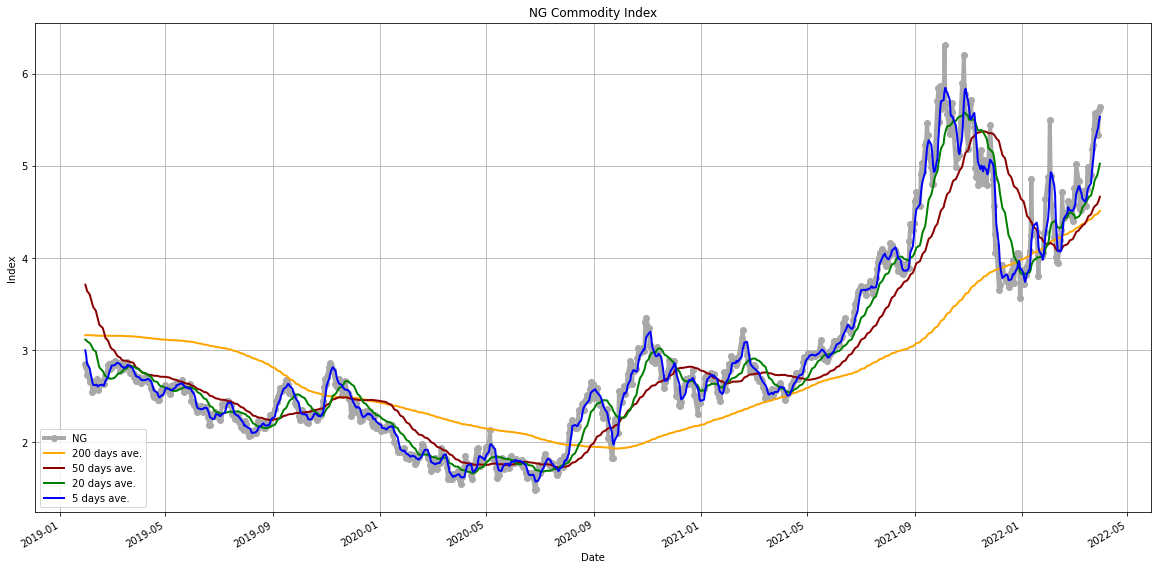



Gold : Displaying from  2018-01-08 00:00:00 to  2022-03-31 00:00:00 



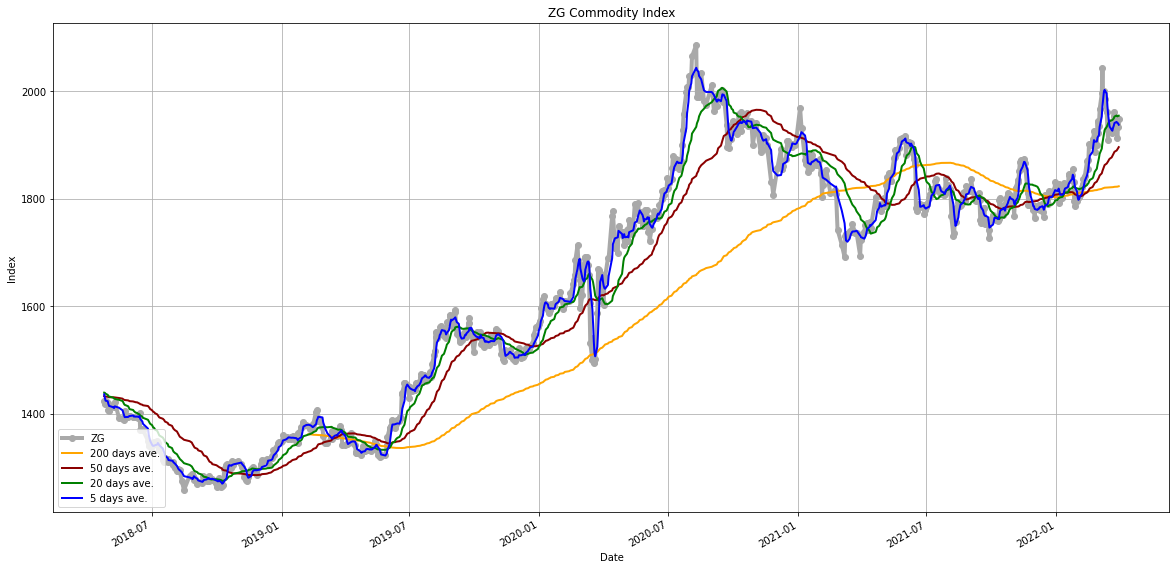



Silver : Displaying from  2018-01-02 00:00:00 to  2022-03-31 00:00:00 



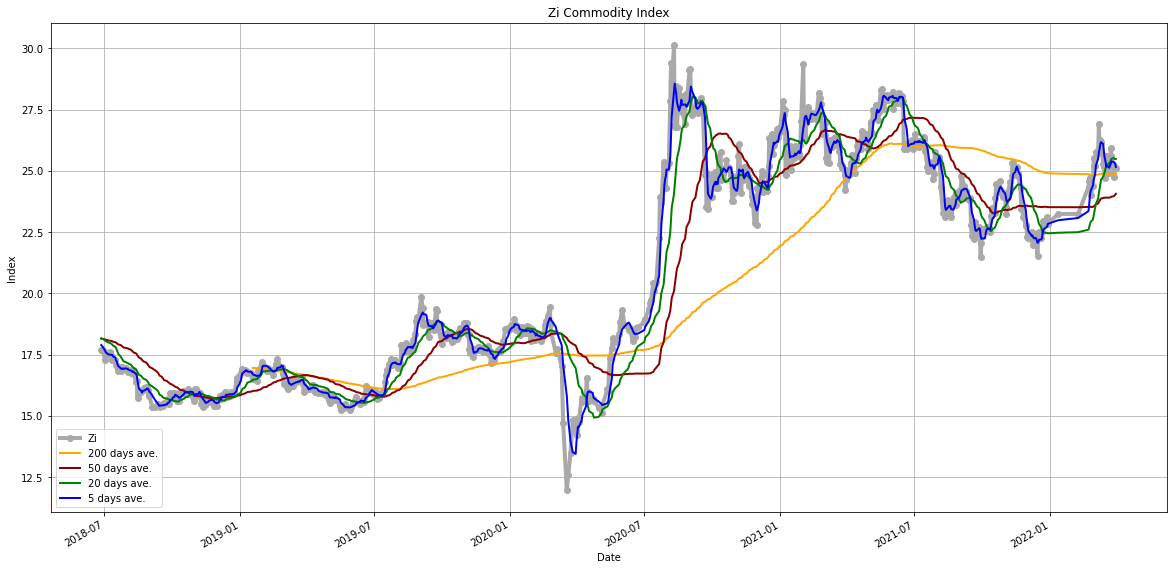



Copper : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



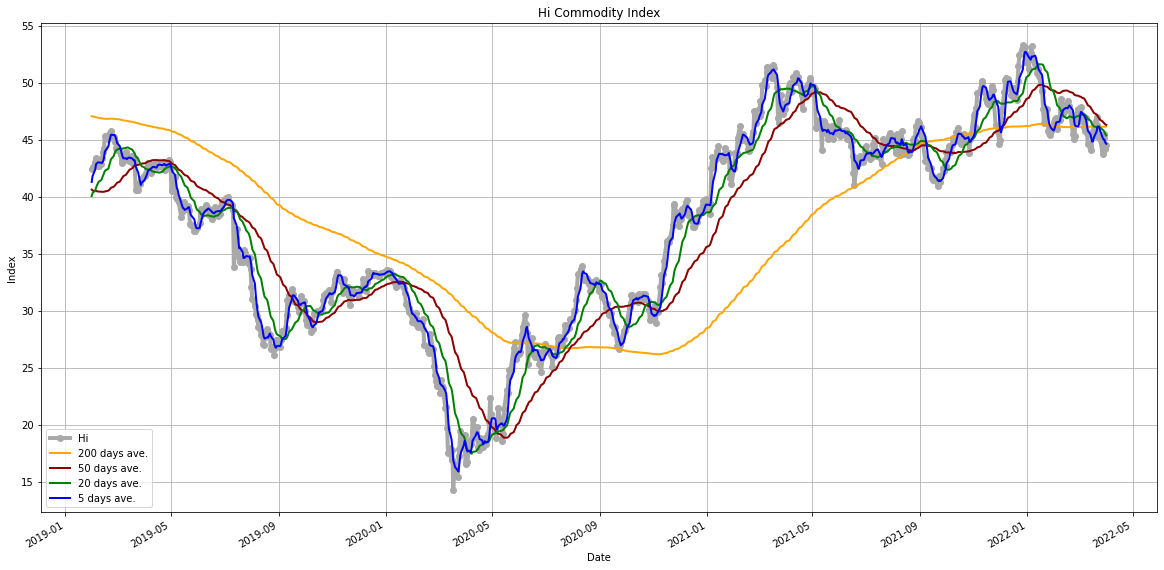



WTi Oil : Displaying from  2018-01-02 00:00:00 to  2022-04-01 00:00:00 



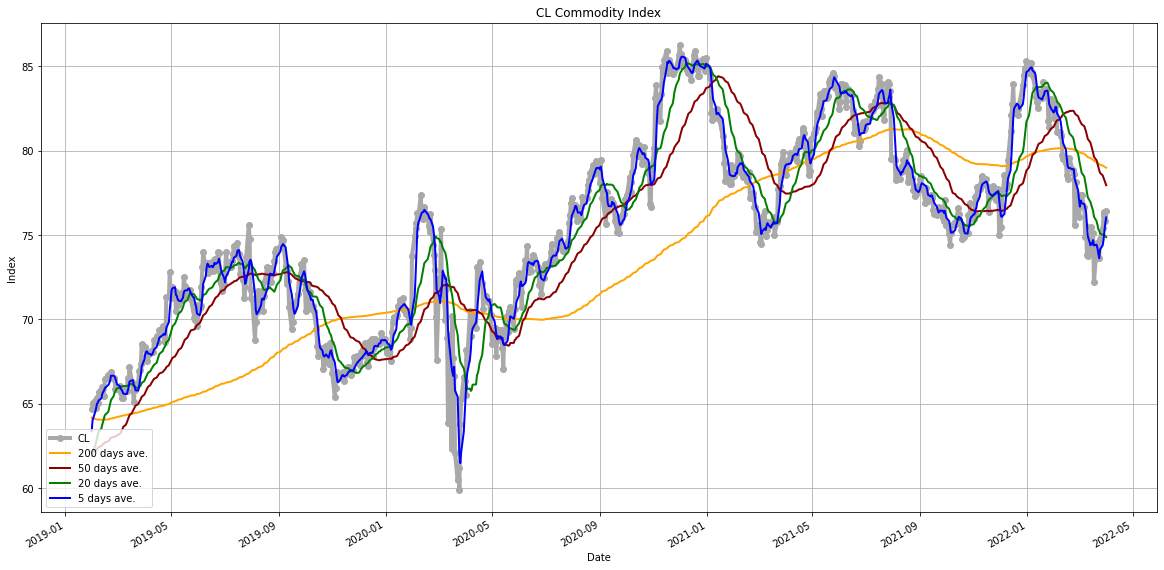

In [5]:
market_index_graphs('2018', 800, 'Commodity')